In [3]:
# pip install tweepy                                        

# API crawling 
하지만 API를 사용하여 원하는 정보를 얻는 방식에는 치명적인 단점이 있다. 바로 7일 내의 자료만 얻을 수 있다는 점이다.  
7일 이전의 자료를 API를 요청하여 얻고 싶다면 돈을 지불해야 한다. 한 달에 20만원 정도로 알고 있다.  
여유가 있는 사람들과 기업은 돈을 지불하면서 자료를 얻어도 나쁘진 않을 것이다.

In [2]:
import tweepy

In [ ]:
# 발급 완료된 key를 입력합니다.
CONSUMER_KEY = "{}"
CONSUMER_SECRET = "{}"
ACCESS_TOKEN_KEY = "{}"
ACCESS_TOKEN_SECRET = "{}"
# 개인정보 인증을 요청하는 Handler입니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# 인증 요청을 수행합니다.
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)
# twitter API를 사용하기 위한 준비
api = wteepy.API(auth)

# twitter API를 사용하여 '트럼프/trump, 바이든/Biden'이 포함된 트윗들을 크롤링한 뒤, entities에서 'user_mentions', 'hashtags'를 추출
keyword = 'Trump'
tweets = api.search(keyword)


# Twitter 크롤링

In [1]:
import re
import time
import random
import requests
import pandas as pd
import datetime as dt
from bs4 import BeautifulSoup
from selenium import webdriver
from tqdm.notebook import tqdm
from urllib.request import Request, urlopen
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait # available since 2.4.0
from selenium.webdriver.support import expected_conditions as EC # available since 2.26.0
from selenium.webdriver.firefox.firefox_binary import  FirefoxBinary
from selenium.webdriver.common.desired_capabilities import  DesiredCapabilities

#### 트위터에서 특정 기간을 검색하는 방법 (예: Blockchain)
Blockchain since:2016-02-15 until:2016-02-16

검색 트럼프, 바이든  
@realDonaldTrump since:2020-09-01 until:2020-10-31
@JoeBiden since:2020-09-01 until:2020-10-31  

[firefox selenium dirver install here](https://github.com/mozilla/geckodriver/releases)  
[geckodriver사용법](https://testmanager.tistory.com/175)


### 파이어폭스를 사용하는 이유:
- 우리는 파이어폭스를 통해서 크롤링을 할 것이다. BeautifulSoup만 이용해서 크롤링을 하면 속도가 느려서 원하는 결과를 얻을 수가 없다. 속도와 정확성 모두를 얻기 위해서는 selenium 및 firefox를 이용해야 한다. Firefox가 안 깔려 있는 독자들은 Firefox를 설치해야 한다.
- [여기 참조](https://medium.com/@whj2013123218/파이썬을-이용한-twitter-크롤링-576f7b098daf)

In [9]:
startdate=dt.date(year=2020,month=9,day=1)
untildate=dt.date(year=2020,month=9,day=2) #하루하루의 결과를 출력하기 위한 중간변수
enddate=dt.date(year=2020,month=9,day=5)

In [21]:
# Create a new instance of the Firefox driver
# browser = webdriver.Firefox(executable_path='/Users/jinwon-kim/Developer/geckodriver')
path = 'C:/임시/RData/'
browser = webdriver.Chrome(path+"chromedriver.exe")

In [23]:
#일정 스크롤이 지나면 페이지가 바뀌어버리는 경향이 있는것같다.. API가 쉬운데 왜 주지 않는건지..

while not enddate==startdate:
    
    url='https://twitter.com/search?q=realDonaldTrump%20since%3A'+str(startdate)+'%20until%3A'+str(untildate)+'&amp;amp;amp;amp;amp;amp;lang=eg'
    browser.get(url)
    time.sleep(3)
    lastHeight = browser.execute_script("return document.body.scrollHeight")
    while True:
        browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)

        newHeight = browser.execute_script("return document.body.scrollHeight")

        if newHeight != lastHeight:
            lastHeight = newHeight
            continue
        break
    
    break
            

In [19]:
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [20]:
browser.execute_script("return document.body.scrollHeight")

13442

In [18]:
lastHeight

5627

In [5]:
html = browser.page_source
soup=BeautifulSoup(html,'html.parser')

In [88]:
soup

<html dir="ltr" lang="ko" style="font-size: 15px;"><head><meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" name="viewport"/>
<link href="//abs.twimg.com" rel="preconnect"/>
<link href="//api.twitter.com" rel="preconnect"/>
<link href="//pbs.twimg.com" rel="preconnect"/>
<link href="//t.co" rel="preconnect"/>
<link href="//video.twimg.com" rel="preconnect"/>
<link href="//abs.twimg.com" rel="dns-prefetch"/>
<link href="//api.twitter.com" rel="dns-prefetch"/>
<link href="//pbs.twimg.com" rel="dns-prefetch"/>
<link href="//t.co" rel="dns-prefetch"/>
<link href="//video.twimg.com" rel="dns-prefetch"/>
<link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web/polyfills.4d8d59c5.js" nonce="" rel="preload"/>
<link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web/vendors~main.aee47a35.js" nonce="" rel="preload"/>
<link as="script" crossorigi

In [6]:
texts=browser.find_elements_by_css_selector("div.css-1dbjc4n.r-18u37iz")

In [7]:
for i in texts:
    print(i.text)

최신 소식을 놓치지 마세요
트위터를 사용하면 가장 먼저 알게 됩니다.
로그인
가입하기
최신 소식을 놓치지 마세요
트위터를 사용하면 가장 먼저 알게 됩니다.
로그인
가입하기
로그인
가입하기
인기
최신
사용자
사진
동영상
타임라인 검색
Jason Lo
@Agenda_1776
·
9월 5일
@Pitch_Purfect20
 @2d7ba3001f664c9
  님, 다른 사람 3명에게 보내는 답글
Staged lol
1
4
RebBrooks
@RebBrooks1
·
9월 5일
@Beth59255632
 님, 
@CodyIsAGoodBoy
 님, 
@realDonaldTrump
 님에게 보내는 답글
Trump is DISGUSTING! Traitor to our military & a danger to lives in this country! Your son deserves nothing but the highest honors & all of our gratitude..you wd expect it MOST from the Commander In Chief! Disgusting. 
2
MicheleB
@micheleb801
·
9월 5일
Anyone else, other than me, not going to get in line to take one of 
@realDonaldTrump
 "hurry get it out before the election" vaccine?
트윗 인용하기
Bonnie Towner DEMOCRAT
@BonnieTowner
 · 9월 5일
Trump contradicts health officials, says 'probably' a Covid-19 vaccine in October http://a.msn.com/01/en-us/BB18IOGr?ocid=st…
이 스레드 보기
4
1
9
Bonnie Towner DEMOCRAT
@BonnieTowner
·
9월 5일
NOPE no way I have waited this long I can 

Erik Henrikson
@ErikHenriksonSF
·
9월 5일
Erik Henrikson
@ErikHenriksonSF
·
9월 5일
Erik Henrikson
@ErikHenriksonSF
Erik Henrikson
@ErikHenriksonSF

@ProjectLincoln
 님과 
@realDonaldTrump
 님에게 보내는 답글

1
9

1
9


TD Patriot
@tommyd2234us
·
9월 5일
@TheDemocrats
  Say they believe Trump talked bad on veterans because of past remarks by 
@realDonaldTrump
 with no one going on the record . Well I’ve heard people say 
@JoeBiden
 molested little girls no one on the record but I believe it by how he sniffs and fondles them .
1
1
2
TD Patriot
@tommyd2234us
·
9월 5일
TD Patriot
@tommyd2234us
·
9월 5일
TD Patriot
@tommyd2234us
TD Patriot
@tommyd2234us

1
1
2
1
1
2


PrideN'Pioneers
@peterdochs
·
9월 4일
@realDonaldTrump
 님에게 보내는 답글
"swear on whatever"? it's called a bible, upside down, right side up it is the bible.
6
22
162
PrideN'Pioneers
@peterdochs
·
9월 4일
PrideN'Pioneers
@peterdochs
·
9월 4일
PrideN'Pioneers
@peterdochs
PrideN'Pioneers
@peterdochs

@realDonaldTrump
 님에게 보내는 답글
6
22
162
6
22
162


InMyOpin

In [ ]:
html body div#react-root div.css-1dbjc4n.r-13awgt0.r-12vffkv div.css-1dbjc4n.r-13awgt0.r-12vffkv div.css-1dbjc4n.r-13qz1uu.r-417010 main.css-1dbjc4n.r-16y2uox.r-1wbh5a2 div.css-1dbjc4n.r-150rngu.r-16y2uox.r-1wbh5a2 div.css-1dbjc4n.r-aqfbo4.r-16y2uox div.css-1dbjc4n.r-1oszu61.r-1niwhzg.r-18u37iz.r-16y2uox.r-1jgb5lz.r-2llsf.r-13qz1uu div.css-1dbjc4n.r-14lw9ot.r-42olwf.r-1ljd8xs.r-13l2t4g.r-1phboty.r-1jgb5lz.r-13qz1uu.r-184en5c div.css-1dbjc4n div.css-1dbjc4n div.css-1dbjc4n div.css-1dbjc4n section.css-1dbjc4n div.css-1dbjc4n div div div.css-1dbjc4n.r-1adg3ll.r-1ny4l3l div.css-1dbjc4n article.css-1dbjc4n.r-1loqt21.r-18u37iz.r-1ny4l3l.r-o7ynqc.r-6416eg div.css-1dbjc4n.r-eqz5dr.r-16y2uox.r-1wbh5a2 div.css-1dbjc4n.r-16y2uox.r-1wbh5a2.r-1ny4l3l.r-1udh08x.r-1yt7n81.r-ry3cjt div.css-1dbjc4n div.css-1dbjc4n.r-18u37iz div.css-1dbjc4n.r-1iusvr4.r-16y2uox.r-1777fci.r-1mi0q7o div.css-1dbjc4n

In [86]:
totalfreq

[{'Date': datetime.date(2020, 9, 1), 'Frequency': 0},
 {'Date': datetime.date(2020, 9, 2), 'Frequency': 0}]

In [7]:
import pandas as pd
df=pd.DataFrame(totalfreq)
df.head()

,Date,Frequency
0,2020-09-01,1246
1,2020-09-02,1267
2,2020-09-03,1550
3,2020-09-04,1741


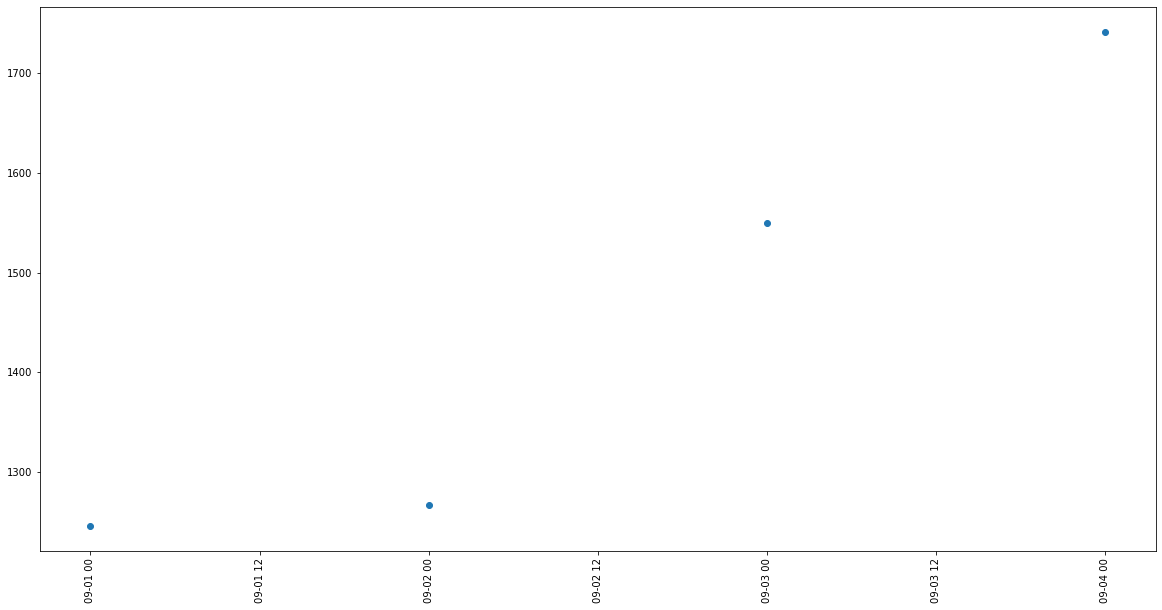

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(df.Date,df.Frequency)

In [52]:
# browser = webdriver.Firefox(executable_path='/Users/jinwon-kim/Developer/geckodriver')
browser = webdriver.Chrome("/Users/jinwon-kim/Developer/chromedriver")
url='https://twitter.com/search?q=@realDonaldTrump%20since%3A'+str(startdate)+'%20until%3A'+str(untildate)+'&amp;amp;amp;amp;amp;amp;lang=eg'
browser.get(url)
# html = browser.page_source
# soup=BeautifulSoup(html,'html.parser')

In [53]:
body = browser.find_element_by_tag_name('body')
for _ in range(5):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.2)
    
tweets =browser.find_elements_by_class_name('tweet-text')

for tweet in tweets:
    print(tweet.text)

# API 크롤링 코드

In [ ]:
# 지원이가 알려준 사이트
# 아직 API를 못받았다.. 그리고 무료API는 정말 기간이 7일짜리인지 모르겠다..
import csv
import tweepy
import ssl

# Oauth keys
consumer_key = "QN3CzI2gScYvDsrhhaL2SRbOPrC"
consumer_secret = "AQU3NwlOqUb1aKxgy0Nk22H5k8jjj0tYJ4nlFRLFZQJCA07TLCJMm"
access_token = "969527167221563392-35WKxHqmuLkkqfe1zqQbmSN276vZTFAbz"
access_token_secret = "wplE6EPMtyqNRESaBV175jRzU5ffgq934nX3h2dNQ7rnzarg"

# Authentication with Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
ssl._create_default_https_context = ssl._create_unverified_context
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

user = api.me()
print (user.name)

# update these for the tweet you want to process replies to 'name' = the account username and you can find the tweet id within the tweet URL
name = 'realDonaldTrump'
tweet_id = ['1290967953542909952']

replies=[]
for tweet in tweepy.Cursor(api.search,q='to:'+name, result_type='recent', timeout=999999).items(100):
    if hasattr(tweet, 'in_reply_to_status_id_str'):
        if (tweet.in_reply_to_status_id_str==tweet_id):
            replies.append(tweet)

with open('trump_data.csv', 'a+') as f:
    csv_writer = csv.DictWriter(f, fieldnames=('user', 'text'))
    csv_writer.writeheader()
    for tweet in replies:
        row = {'user': tweet.user.screen_name, 'text': tweet.text.replace('\n', ' ')}
        csv_writer.writerow(row)

# firefox driver 사용법

In [14]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait # available since 2.4.0
from selenium.webdriver.support import expected_conditions as EC # available since 2.26.0
import time

# Create a new instance of the Firefox driver
driver = webdriver.Firefox(executable_path='/Users/jinwon-kim/Developer/geckodriver')

# go to the google home page
driver.get("http://www.google.com")
# the page is ajaxy so the title is originally this:
print(driver.title)

# find the element that's name attribute is q (the google search box)
inputElement = driver.find_element_by_name("q")

# type in the search
inputElement.send_keys("cheese!")

# submit the form (although google automatically searches now without submitting)
inputElement.submit()
time.sleep(5)

try:
    # we have to wait for the page to refresh, the last thing that seems to be updated is the title
    WebDriverWait(driver, 10).until(EC.title_contains("cheese!"))

    # You should see "cheese! - Google Search"
    print(driver.title)
    time.sleep(5)

finally:
    driver.quit()

Google
cheese! - Google 검색


# another way...

In [54]:
import selenium

from selenium import webdriver

from selenium.webdriver.common.keys import Keys

from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import WebDriverWait

from selenium.webdriver.support import expected_conditions as EC

from selenium.common.exceptions import TimeoutException



from bs4 import BeautifulSoup as bs

import time

In [79]:
def init_driver():
     # initiate the driver:
     driver = webdriver.Firefox(executable_path='/Users/jinwon-kim/Developer/geckodriver')
     # set a default wait time for the browser [5 seconds here]:
     driver.wait = WebDriverWait(driver, 5)
     return driver
    
def close_driver(driver):
    driver.close()
    return

def login_twitter(driver, username, password):
    # open the web page in the browser:
    driver.get("https://twitter.com/login")
    # find the boxes for username and password
    username_field = driver.find_element_by_xpath('/html/body/div/div/div/div[2]/main/div/div/div[1]/form/div/div[1]/label/div/div[2]/div/input').send_keys(username) #//*[@id="user_login"]
    password_field = driver.find_element_by_xpath('/html/body/div/div/div/div[2]/main/div/div/div[1]/form/div/div[2]/label/div/div[2]/div/input').send_keys(password)#//*[@id="user_pass"]
    # enter your username:

#     username_field.send_keys(username[0])
#     driver.implicitly_wait(1)
#     # enter your password:
#     password_field.send_keys(password[0])
#     driver.implicitly_wait(1)
    # click the "Log In" button:
#     driver.find_element_by_class_name("EdgeButtom--medium").click()
    driver.find_element_by_xpath('/html/body/div/div/div/div[2]/main/div/div/div[1]/form/div/div[3]/div').click()#//*[@id="wp-submit"]
    
    return
class wait_for_more_than_n_elements_to_be_present(object):

    def __init__(self, locator, count):
        self.locator = locator
        self.count = count
    def __call__(self, driver):
        try:
            elements = EC._find_elements(driver, self.locator)
            return len(elements) > self.count
        except StaleElementReferenceException:
            return False

In [56]:
def search_twitter(driver, query):
    # wait until the search box has loaded:
    box = driver.wait.until(EC.presence_of_element_located((By.NAME, "q")))
    # find the search box in the html:
    driver.find_element_by_name("q").clear()
    # enter your search string in the search box:
    box.send_keys(query)
    # submit the query (like hitting return):
    box.submit()
    # initial wait for the search results to load
    wait = WebDriverWait(driver, 10)
    try:
        # wait until the first search result is found. Search results will be tweets, which are html list items and have the class='data-item-id':
        wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "li[data-item-id]")))
        # scroll down to the last tweet until there are no more tweets:
        while True:
            # extract all the tweets:
            tweets = driver.find_elements_by_css_selector("li[data-item-id]")
            # find number of visible tweets:
            number_of_tweets = len(tweets)
            # keep scrolling:
            driver.execute_script("arguments[0].scrollIntoView();", tweets[-1])
            try:
                # wait for more tweets to be visible:
                wait.until(wait_for_more_than_n_elements_to_be_present(
                    (By.CSS_SELECTOR, "li[data-item-id]"), number_of_tweets))
            except TimeoutException:
                # if no more are visible the "wait.until" call will timeout. Catch the exception and exit the while loop:
                break
        # extract the html for the whole lot:
        page_source = driver.page_source
    except TimeoutException:
        # if there are no search results then the "wait.until" call in the first "try" statement will never happen and it will time out. So we catch that exception and return no html.
        page_source=None
    return page_source

In [57]:
# 트위터에서 정보 읽기
def extract_tweets(page_source):
    soup = bs(page_source,'lxml')
    tweets = []
    for li in soup.find_all("li", class_='js-stream-item'):
        # If our li doesn't have a tweet-id, we skip it as it's not going to be a tweet.
        if 'data-item-id' not in li.attrs:
            continue
        else:
            tweet = {
                'tweet_id': li['data-item-id'],
                'text': None,
                'user_id': None,
                'user_screen_name': None,
                'user_name': None,
                'created_at': None,
                'retweets': 0,
                'likes': 0,
                'replies': 0
            }
            # Tweet Text
            text_p = li.find("p", class_="tweet-text")
            if text_p is not None:
                tweet['text'] = text_p.get_text()
            # Tweet User ID, User Screen Name, User Name
            user_details_div = li.find("div", class_="tweet")
            if user_details_div is not None:
                tweet['user_id'] = user_details_div['data-user-id']
                tweet['user_screen_name'] = user_details_div['data-screen-name']
                tweet['user_name'] = user_details_div['data-name']
            # Tweet date
            date_span = li.find("span", class_="_timestamp")
            if date_span is not None:
                tweet['created_at'] = float(date_span['data-time-ms'])
            # Tweet Retweets
            retweet_span = li.select("span.ProfileTweet-action--retweet > span.ProfileTweet-actionCount")
            if retweet_span is not None and len(retweet_span) > 0:
                tweet['retweets'] = int(retweet_span[0]['data-tweet-stat-count'])
            # Tweet Likes
            like_span = li.select("span.ProfileTweet-action--favorite > span.ProfileTweet-actionCount")
            if like_span is not None and len(like_span) > 0:
                tweet['likes'] = int(like_span[0]['data-tweet-stat-count'])
            # Tweet Replies
            reply_span = li.select("span.ProfileTweet-action--reply > span.ProfileTweet-actionCount")
            if reply_span is not None and len(reply_span) > 0:
                tweet['replies'] = int(reply_span[0]['data-tweet-stat-count'])
            tweets.append(tweet)
    return tweets

In [81]:
if __name__ == "__main__":
    # start a driver for a web browser:
    driver = init_driver()
    # log in to twitter (replace username/password with your own):
    username = "jw0831@gmail.com"
    password = "Kjw2057805!"
    login_twitter(driver, username, password)
    # search twitter:
    query = "realDonaldTrump"
    page_source = search_twitter(driver, query)
    # extract info from the search results:
    tweets = extract_tweets(page_source)
   

    # ==============================================

    # add in any other functions here

    # maybe some analysis functions

    # maybe a function to write the info to file

    # ==============================================



    # close the driver:

    close_driver(driver)

TimeoutException: Message: 


___
# 새출발 (mac 에서 에러가 나오는것 같으므로 학원에서 해보기)

In [10]:
pip install GetOldTweets3

Note: you may need to restart the kernel to use updated packages.


In [1]:
import GetOldTweets3 as got

In [2]:
# 가져올 범위 정의 # 트럼프 임기 시작일: 2017년 1월 20일 
import datetime # datetime 패키지 
days_range = [] # datetime 패키지, datetime 클래스(날짜와 시간 함께 저장)

# strptime 메서드: 문자열 반환 
start = datetime.datetime.strptime("2020-09-01", "%Y-%m-%d") 
end = datetime.datetime.strptime("2020-10-31", "%Y-%m-%d") 

date_generated = [start+datetime.timedelta(days=x) for x in range(0, (end-start).days)] 

for date in date_generated: 
    days_range.append(date.strftime("%Y-%m-%d")) 
print("===설정된 트윗 수집 기간: {} ~ {}===".format(days_range[0], days_range[-1])) 
print("===총 {}일 간의 데이터 수집===".format(len(days_range)))


===설정된 트윗 수집 기간: 2020-09-01 ~ 2020-10-30===
===총 60일 간의 데이터 수집===


In [3]:
# tweetCriteria로 수집 기준 정의
tweetCriteria = got.manager.TweetCriteria().setUsername("realDonaldTrump").setSince("2020-09-01").setUntil("2020-10-31")

In [4]:
import time
# 수집
print("데이터 수집 시작=========")
start_time = time.time()

tweet = got.manager.TweetManager.getTweets(tweetCriteria)

print("데이터 수집 완료======= {0:0.2f}분".format((time.time() - start_time)/60))
print("=== 총 트윗 개수 {} ===".format(len(tweet)))

데이터 수집 시작=========


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



An error occured during an HTTP request: HTTP Error 404: Not Found
Try to open in browser: https://twitter.com/search?q=%20from%3Arealdonaldtrump%20since%3A2020-09-01%20until%3A2020-10-31&src=typd
Traceback (most recent call last):
  File "/Users/jinwon-kim/Developer/anaconda3/lib/python3.8/site-packages/GetOldTweets3/manager/TweetManager.py", line 343, in getJsonResponse
    response = opener.open(url)
  File "/Users/jinwon-kim/Developer/anaconda3/lib/python3.8/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/Users/jinwon-kim/Developer/anaconda3/lib/python3.8/urllib/request.py", line 640, in http_response
    response = self.parent.error(
  File "/Users/jinwon-kim/Developer/anaconda3/lib/python3.8/urllib/request.py", line 569, in error
    return self._call_chain(*args)
  File "/Users/jinwon-kim/Developer/anaconda3/lib/python3.8/urllib/request.py", line 502, in _call_chain
    result = func(*args)
  File "/Users/jinwon-kim/Developer/anaconda3/lib/pytho

TypeError: object of type 'NoneType' has no len()

In [15]:
# 원하는 정보만 저장
# 유저 아이디, 트윗 내용, 날짜, 좋아요 수, 리트윗 수, 링크

from tqdm.notebook import tqdm
tweet_list = []
for i in tqdm(tweet):
    username = i.username
    tweet_date = i.date.strftime("%Y-%m-%d")
    tweet_time = i.date.strftime("%H:%M:%dS")
    content = i.text
    favorites = i.favorites
    retweets = i.retweets
    link = i.permalink
    
    info_list = [username, tweet_date, tweet_time, content, favorites, retweets, link]
    tweet_list.append(info_list)

NameError: name 'tweet' is not defined

In [ ]:
# 파일 저장
import pandas as pd

#데이터프레임 생성
twitter_df = pd.DataFrame(tweet_list, columns = ["ID","날짜","시간","내용","리트윗 수","좋아요 수","링크"])

#csv_file만들기
twitter_df.to_csv("twitter_trump.csv", index = False)
print("=== {}개의 트윗 저장 ===".format(len(tweet_list)))